In [1]:
import tensorflow as tf
import os

In [2]:
url='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
dataset_path=tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=url,extract=True)
base_dir=os.path.join(os.path.dirname(dataset_path),'cats_and_dogs_filtered')

In [3]:
train_cats=os.path.join(base_dir,'train','cats')
train_dogs=os.path.join(base_dir,'train','dogs')
validation_cats=os.path.join(base_dir,'validation','cats')
validation_dogs=os.path.join(base_dir,'validation','dogs')
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

In [4]:
print(len(os.listdir(train_cats)))
print(len(os.listdir(validation_cats)))
print(len(os.listdir(train_dogs)))
print(len(os.listdir( validation_cats)))
print(len(os.listdir( train_dir)))
print(len(os.listdir( validation_dir)))

1000
500
1000
500
2
2


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    
    tf.keras.layers.Flatten(),
     tf.keras.layers.Dropout(.50),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [6]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [9]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),  
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [11]:
# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50, 
      verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/10
100/100 - 106s - loss: 0.6934 - accuracy: 0.5280 - val_loss: 0.6812 - val_accuracy: 0.5080
Epoch 2/10
100/100 - 94s - loss: 0.6711 - accuracy: 0.5825 - val_loss: 0.6575 - val_accuracy: 0.6110
Epoch 3/10
100/100 - 94s - loss: 0.6366 - accuracy: 0.6350 - val_loss: 0.6186 - val_accuracy: 0.6850
Epoch 4/10
100/100 - 89s - loss: 0.6047 - accuracy: 0.6660 - val_loss: 0.6116 - val_accuracy: 0.6300
Epoch 5/10
100/100 - 95s - loss: 0.5802 - accuracy: 0.7000 - val_loss: 0.5739 - val_accuracy: 0.7040
Epoch 6/10
100/100 - 93s - loss: 0.5489 - accuracy: 0.7150 - val_loss: 0.5673 - val_accuracy: 0.6960
Epoch 7/10
100/100 - 95s - loss: 0.5341 - accuracy: 0.7295 - val_loss: 0.5493 - val_accuracy: 0.7140
Epoch 8/10
100/100 - 94s - loss: 0.5120 - accuracy: 0.7525 - val_loss: 0.5468 - val_accuracy: 0.7160
Epoch 9/10
100/100 - 94s - loss: 0.4895 - accuracy: 0.7690 - val_loss: 0.5282 - val_accuracy: 0.72

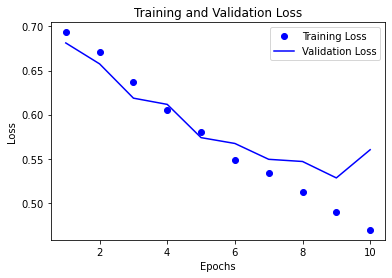

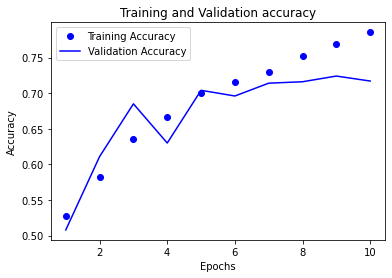

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
history_dict=history.history

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.clf()

In [14]:
from keras.models import load_model

model.save('cat_dog.h5')

Using TensorFlow backend.


In [1]:
from tensorflow.keras.applications import VGG19
conv_base=VGG19(weights='imagenet',
               include_top=False,
               input_shape=(150,150,3))

80142336/80134624 [==============================] - 26s 0us/step


In [2]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     